In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import scipy.stats as st
import random
from tqdm import tqdm

from model import *
from dataset import *
from utils import *

In [2]:
hyperparams = {
        'n_tasks': 1000,
        'n_episode': 150,
        'n_timesteps': 10,
        'input_dim': 2, 
        'hidden_dim': 512,
        'output_dim': 2,
        'lr': 1e-4,
        'batch_size': 128,
        'n_epochs': 50,
        }

In [3]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
def load_model(n_particle=1):
    model = MyModel(input_dim=hyperparams['input_dim'], hidden_dim=hyperparams['hidden_dim'],
                    output_dim=hyperparams['output_dim'], n_particle=n_particle).to(device)
    checkpoint = torch.load('Task1_multiTask.pth.tar', map_location=device)
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    return model

# pretraining stage

In [4]:
checkpoint = torch.load('Task1_multiTask.pth.tar')
loss_multitask = checkpoint['loss']

In [5]:
checkpoint_ = torch.load('Task1_reptile.pth.tar')
loss_reptile = checkpoint_['loss']

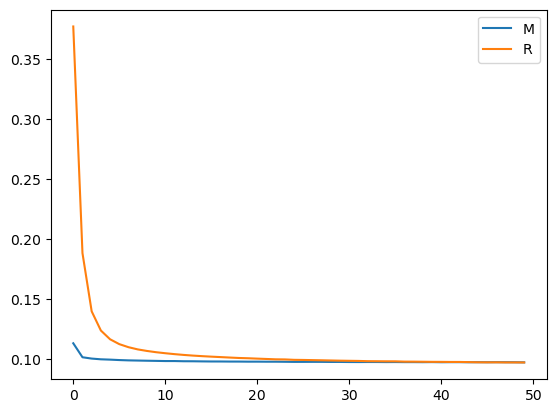

In [7]:
plt.plot(loss_multitask, label='M')
plt.plot(loss_reptile, label='R')
plt.legend()
plt.savefig('./img/pretraining_loss.png')

# adaptation stage

In [8]:
loss_smcd = np.load('loss_smcd.npy')
loss_N = np.load('loss_N.npy')
loss_GD = np.load('loss_GD.npy')

In [9]:
ind = np.argsort(loss_smcd)

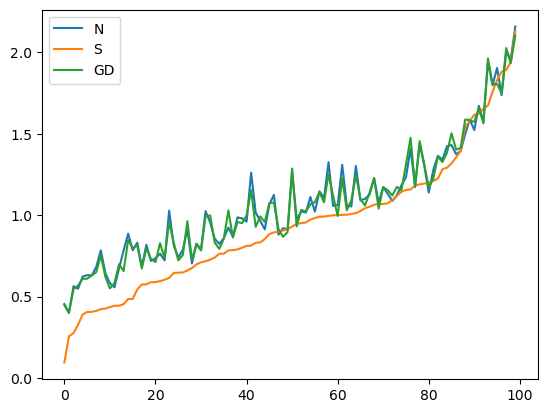

In [10]:
plt.plot(loss_N[ind], label='N')
plt.plot(loss_smcd[ind], label='S')
plt.plot(loss_GD[ind], label='GD')
plt.legend()

In [25]:
losses_smcd = np.load('losses_smcd_repeated.npy')

In [26]:
loss_smcd_mean = losses_smcd.mean(axis=0)
loss_smcd_std = losses_smcd.std(axis=0)

In [27]:
ind = np.argsort(loss_smcd_mean)

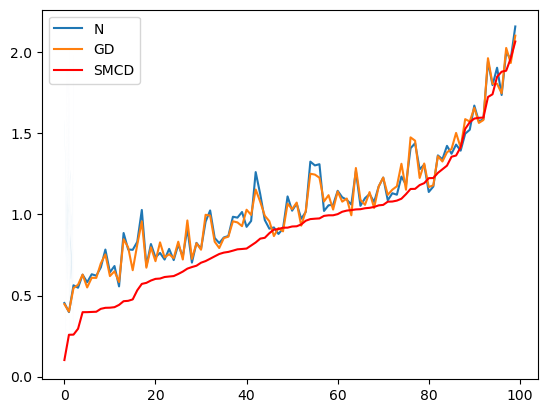

In [28]:
plt.plot(loss_N[ind], label='N')
plt.plot(loss_GD[ind], label='GD')

plt.plot(loss_smcd_mean[ind], color='r', label='SMCD')
plt.fill_between(loss_smcd_mean[ind], loss_smcd_mean-loss_smcd_std, loss_smcd_mean+loss_smcd_std, alpha=0.5)
plt.legend()
plt.savefig('./img/multi-task loss with three adaptation strategies.png')